# Выбор способа решения
Описанный в задаче процесс называется *одномерное дискретное случайное блуждание с одним поглощающим экраном*.

Данный процесс хорошо описан при `N→∞`, но для конечных N каких-либо аналитических методов определения вероятности поглощения я не нашел.

Поэтому задача была решена **пошаговым моделированием** поведения пьяницы. 

Мы выполняем N шагов, и на каждом шаге рассчитываем вероятность нахождения пьяницы во всех возможных позициях (кроме тех позиций, в которых он уже упал с обрыва). Сложность алгоритма по времени `O(N²)`, по памяти `O(N)`.

### Ремарка о неоднозначности в условии задачи
В условии задачи содержалась некоторая неоднозначность — неясно, что произойдет с пьяницей, когда он сделает два шага вперед из начальной позиции (упадет с обрыва или будет балансировать на грани обрыва — и упадет только после третьего шага).

Приведенное решение исходит из того, что пьяница упадет с обрыва, сделав 2 последовательных шага вперед из начальной точки.

Если это предположение неверно и пьянице требуется сделать 3 последовательных шага вперед из начальной точки, чтобы упасть с обрыва, то достаточно установить параметр функции distance_to_death = 3, чтобы получить правильный ответ.

In [98]:
import copy

def calculate_survival_probability(steps_count=5, distance_to_death=2):
    # В начале мы с вероятностью 1 находимся на отметке 0
    probabilities = dict.fromkeys(list(range(-steps_count, distance_to_death + 1)), 0)
    probabilities[0] = 1
    
    # Делаем заданное число шагов
    for step in range(steps_count):
        probabilities_next_step = copy.deepcopy(probabilities)
        
        # Пьяница может находиться в интервале [-steps_count, distance_to_death) 
        # Перебираем все положения этого интервала и вычисляем вероятности для следующего шага
        for i in range(-steps_count, distance_to_death):
            p = probabilities[i]
            if p:
                probabilities_next_step[i] = 0
                probabilities_next_step[i - 1] += p * 2 / 3
                probabilities_next_step[i + 1] += p * 1 / 3

        # И повторяем процесс снова 
        probabilities = probabilities_next_step
        
    '''
    После работы функции в словаре probabilities по ключу i будет находиться 
    вероятность нахождения пьяницы на расстоянии i шагов от начальной точки,
    где i находится в интервале [-steps_count, distance_to_death).
    
    По ключу distance_to_death будет находиться вероятность попадания пьяницы
    на позицию distance_to_death в какой-либо момент его путешествия.
    '''
    return 1 - probabilities[distance_to_death]
        

## Какова вероятность выжить после 5 шагов?

Для нахождения вызовем функцию calculate_survival_probability.

In [103]:
calculate_survival_probability(5)

0.8395061728395061

Ответ: **0.8395061728395061**.

## Построим график функции
Число шагов будем варьировать от 1 до 99.

На графике видно, что при большом числе шагов вероятность выжить сходится к некоторому значению.

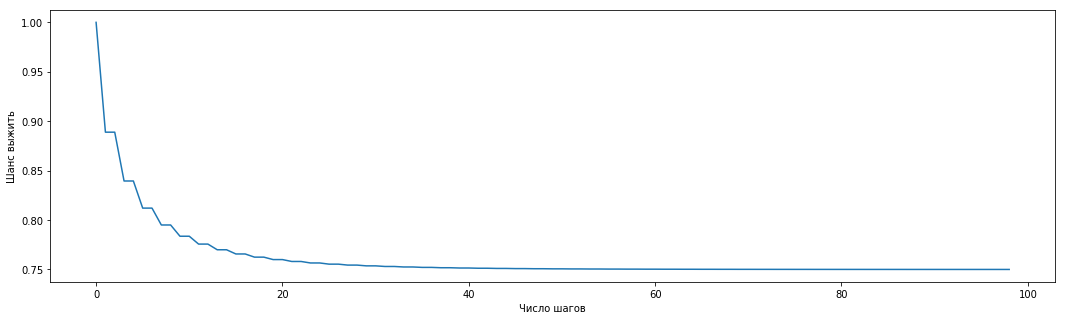

In [105]:
import matplotlib.pyplot as plt

data = np.array([calculate_survival_probability(steps) for steps in range(1, 100)])

plt.rcParams['figure.figsize'] = (18, 5)
plt.plot(data)
plt.ylabel('Шанс выжить')
plt.xlabel('Число шагов')
plt.show()

Узнаем это значение при 1000 шагов (приближенный предел нашей функции).

In [106]:
calculate_survival_probability(1000)

0.7500000000000004